# Colorization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import api
from keras.api import layers
from skimage.color import lab2rgb, rgb2lab
from PIL import Image
import PIL
from os import listdir

In [2]:
def image_load(path):
    list_of_name = listdir(path=path)
    list_of_img = [Image.open(path+name) for name in list_of_name]
    return list_of_img

In [3]:
path_for_b_w = 'D://work//NN//Colorization//b_w_img//'
path_for_test = 'D://work//NN//Colorization//train_imgs//'
model_name = 'colorization_cat.h5'
save_load_path = 'D:/work//NN//Colorization//saved_model'
list_of_img = image_load(path_for_test)
print(np.array(list_of_img[0]).shape)

(588, 643, 3)


# Convert image to lab format.

In [4]:
# Необходимо перевести изображение в формат lab. Выделить из этого формата две цветные составляющие ab
# Исходное изображение нормируем на 255. Яркостная составляющая (1, h, w, 1). Цветная (1, h,w, 2)
def img_processsed_image(img:Image.Image):
    img = img.resize((256, 256), Image.BILINEAR)
    img = np.array(img, dtype=float)
    size = img.shape
    lab = rgb2lab(1.0 / 255 * img)
    X = lab[:, :, 0]
    Y = lab[:, :, 1:]
    Y /= 128
    X = X.reshape(1, size[0], size[1], 1)
    Y = Y.reshape(1, size[0], size[1], 2)
    return X, Y, size

# Loading images

In [5]:
X, Y, size = [], [], []
for i in range(len(list_of_img)):
    x_, y_, size_ = img_processsed_image(list_of_img[0])
    X.append(x_)
    Y.append(y_)
X = np.array(X).reshape((-1, 256, 256, 1))
Y = np.array(Y).reshape((-1, 256, 256, 2))
Y.shape

(9, 256, 256, 2)

# Building a model

In [6]:
# На вход будет подаваться изображение с одной, яркостной составляющей X(batch, h, w, 1)

inp1 = layers.Input((None, None, 1)) # 256 x 256 x 1
conv1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inp1) # 256x256x64
conv2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu', strides=2)(conv1) # 128x128x64

conv3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(conv2) # 256x256x128
conv4 = layers.Conv2D(128, (3, 3), padding='same', activation='relu', strides=2)(conv3) # 128x128x128

conv5 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(conv4) # 128x128x256
conv6 = layers.Conv2D(256, (3, 3), padding='same', activation='relu', strides=2)(conv5) # 64x64x256

conv7 = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(conv6) # 64x64x512

conv8 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(conv7) # 64x64x128
conv9 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(conv8) # 64x64x128

ups1 = layers.UpSampling2D(size=(2, 2))(conv9) # 128x128x128

conv10 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(ups1) # 128x128x64

ups2 = layers.UpSampling2D(size=(2, 2))(conv10) # 256x256x128

conv11 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(ups2) # 256x256x32
conv12 = layers.Conv2D(2, (3, 3), padding='same', activation='tanh')(conv11) # 256x256x2

ups3 = layers.UpSampling2D(size=(2, 2))(conv12)  # 512x512x2

model = api.Model(inp1, ups3)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Model training

In [7]:
hist = model.fit(x=X, y=Y, batch_size=1, epochs=50)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.3797 - loss: 0.5745
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8982 - loss: 0.0306
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9051 - loss: 0.0101
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9142 - loss: 0.0084
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9177 - loss: 0.0076
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9202 - loss: 0.0076
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9201 - loss: 0.0069
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9187 - loss: 0.0060
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9128 - loss: 0.0051
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9122 - loss: 0.0061
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9066 - loss: 0.0044
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9139 - loss: 0.0031
Epoch 13/50
9/9 ━━

# We restore the image, convert it to the RGB format.

In [8]:
def get_colorize_pic(img):
    X, Y, size = img_processsed_image(img)
    ab = model.predict(X) * 128
    min_val, max_val = -128, 127
    ab = np.clip(ab[0], min_val, max_val)
    
    cur = np.zeros((size[0], size[1], 3))
    cur[:, :, 0] = np.clip(X[0][:, :, 0], 0, 100)
    cur[:, :, 1:] = ab
    cur = lab2rgb(cur)
    return cur

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


C:\Users\Denis\AppData\Local\Temp\ipykernel_312\4220544290.py:10: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 418 negative Z values that have been clipped to zero
  cur = lab2rgb(cur)


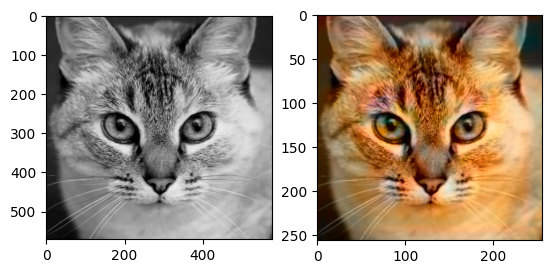

In [10]:

orig_img = image_load(path_for_b_w)  #loading black and white image.
plt.subplot(1, 2, 1)
plt.imshow(orig_img[0])
colorize_img = get_colorize_pic(orig_img[0])
plt.subplot(1, 2, 2)
plt.imshow(colorize_img) # Output of the colored image


In [11]:
model.save(save_load_path+model_name)
model.load_weights(save_load_path+model_name) # loading weights